## Import libs

In [1]:
import numpy as np

import matplotlib as mpl
#mpl.rcParams['mathtext.fontset'] = 'cm'
#mpl.rc('font', family='serif')

import matplotlib.pyplot as plt
import matplotlib.image as img 
from matplotlib import ticker, cm

import matplotlib.patches as patches
from matplotlib.ticker import MaxNLocator

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

import sys, code, os
import math
import random

from scipy import stats
from scipy import interpolate 
from scipy.optimize import curve_fit

from array import array

import pickle

import time

## data dir

In [4]:
mypath = "/Users/shaoleili/Downloads/mweber_constrainer_images"

## Some functions

In [9]:
def get_errs(n):
    err_list = []
    for i in range(0,len(n)):
        if n[i]!=0:
            err_i = np.sqrt(n[i])
        else:
            err_i = 1.
        err_list.append(err_i)
    return np.asarray(err_list)

def get_centers(bins,step):
    centers_list = []
    n = len(bins)-1
    for i in range(0,n):
        e_i = bins[i]+step/2.
        centers_list.append(e_i)
    return np.asarray(centers_list)

## Read RawCounts

In [89]:
with open(mypath+'/test_gan_rawcounts_5851_full_length.pkl','rb') as file:
    gan_raw_plane = pickle.load(file,encoding='bytes')
    gan_raw_chn = pickle.load(file,encoding='bytes')
file.close()

with open(mypath+'/test_real_rawcounts_5851_full_length.pkl','rb') as file:
    real_raw_plane = pickle.load(file,encoding='bytes')
    real_raw_chn = pickle.load(file,encoding='bytes')
file.close()

with open(mypath+'/Th5851-002.pkl','rb') as file:
    origin_raw_plane = pickle.load(file,encoding='bytes')
    origin_raw_chn = pickle.load(file,encoding='bytes')
file.close()

with open(mypath+'/test_gan_recon.pkl','rb') as file:
    real_light_e = pickle.load(file,encoding='bytes')
file.close()

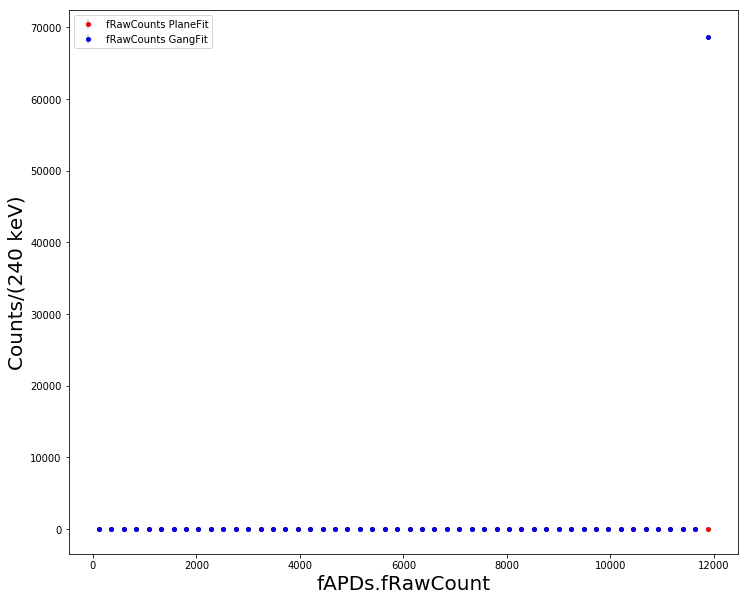

In [61]:
left = 0
right = 12000
nbins = 50
mybins = np.linspace(left,right,nbins+1)
e_step = (right-left)/nbins
ncharge, binscharge = np.histogram(gan_raw_plane,bins=mybins)
nlight, binslight = np.histogram(gan_raw_chn,bins=mybins)

err_c = get_errs(ncharge)
err_s = get_errs(nlight)
cent  = get_centers(mybins,e_step)

plt.rcParams['figure.figsize'] = [12, 10]
plt.errorbar(cent,ncharge,yerr=err_c,ecolor='lightgrey',fmt='o',color='r',markersize=4.,label='fRawCounts PlaneFit')
plt.errorbar(cent,nlight,yerr=err_s,ecolor='lightgrey',fmt='o',color='b',markersize=4.,label='fRawCounts GangFit')
plt.legend()
plt.xlabel(r'fAPDs.fRawCount',fontsize=20)
plt.ylabel(r'Counts/(%.0f keV)'%(e_step),fontsize=20)
plt.savefig('./test_gan_rawcounts_5851_full_length.png',bbox_inches = 'tight')
plt.show()

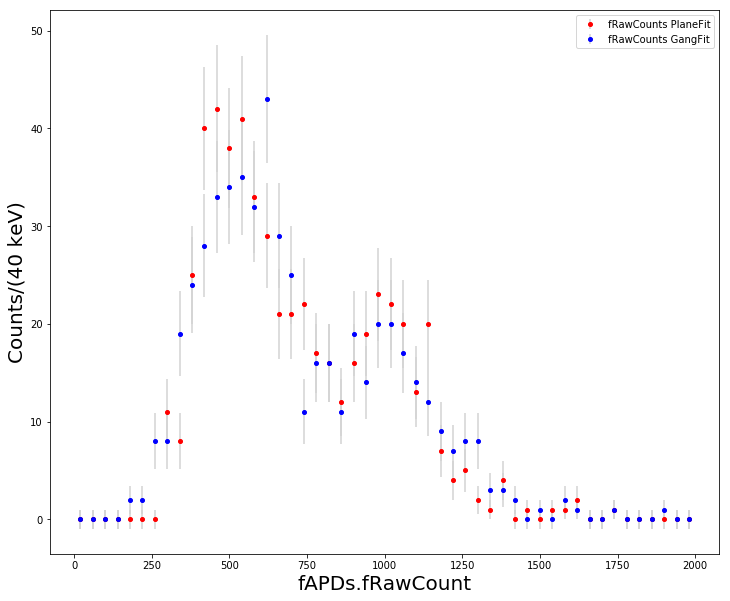

In [72]:
left = 0
right = 2000
nbins = 50
mybins = np.linspace(left,right,nbins+1)
e_step = (right-left)/nbins
ncharge, binscharge = np.histogram(real_raw_plane,bins=mybins)
nlight, binslight = np.histogram(real_raw_chn,bins=mybins)

err_c = get_errs(ncharge)
err_s = get_errs(nlight)
cent  = get_centers(mybins,e_step)

plt.rcParams['figure.figsize'] = [12, 10]
plt.errorbar(cent,ncharge,yerr=err_c,ecolor='lightgrey',fmt='o',color='r',markersize=4.,label='fRawCounts PlaneFit')
plt.errorbar(cent,nlight,yerr=err_s,ecolor='lightgrey',fmt='o',color='b',markersize=4.,label='fRawCounts GangFit')
plt.legend()
plt.xlabel(r'fAPDs.fRawCount',fontsize=20)
plt.ylabel(r'Counts/(%.0f keV)'%(e_step),fontsize=20)
plt.savefig('./test_real_rawcounts_5851_full_length.png',bbox_inches = 'tight')
plt.show()

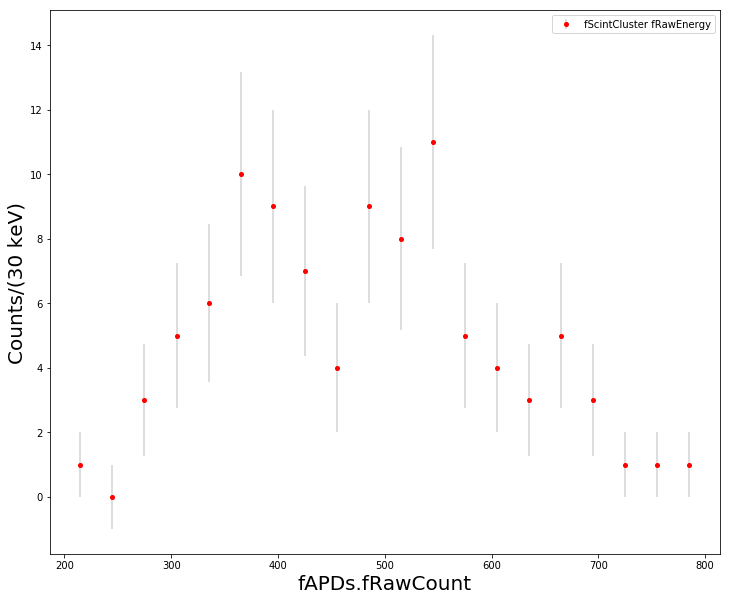

In [65]:
left = 200
right = 800
nbins = 20
mybins = np.linspace(left,right,nbins+1)
e_step = (right-left)/nbins
ncharge, binscharge = np.histogram(real_light_e[:,1],bins=mybins)
#nlight, binslight = np.histogram(real_raw_chn,bins=mybins)

err_c = get_errs(ncharge)
#err_s = get_errs(nlight)
cent  = get_centers(mybins,e_step)

plt.rcParams['figure.figsize'] = [12, 10]
plt.errorbar(cent,ncharge,yerr=err_c,ecolor='lightgrey',fmt='o',color='r',markersize=4.,label='fScintCluster fRawEnergy')
#plt.errorbar(cent,nlight,yerr=err_s,ecolor='lightgrey',fmt='o',color='b',markersize=4.,label='fRawCounts GangFit')
plt.legend()
plt.xlabel(r'fAPDs.fRawCount',fontsize=20)
plt.ylabel(r'Counts/(%.0f keV)'%(e_step),fontsize=20)
plt.savefig('./test_real_light_e_5851_full_length.png',bbox_inches = 'tight')
plt.show()

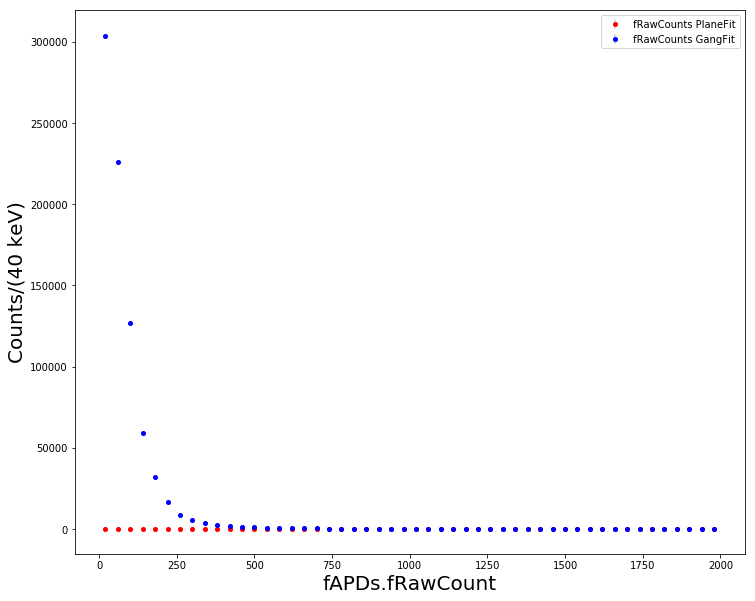

In [91]:
left = 0
right = 2000
nbins = 50
mybins = np.linspace(left,right,nbins+1)
e_step = (right-left)/nbins
ncharge, binscharge = np.histogram(origin_raw_plane,bins=mybins)
nlight, binslight = np.histogram(origin_raw_chn,bins=mybins)

err_c = get_errs(ncharge)
err_s = get_errs(nlight)
cent  = get_centers(mybins,e_step)

plt.rcParams['figure.figsize'] = [12, 10]
plt.errorbar(cent,ncharge,yerr=err_c,ecolor='lightgrey',fmt='o',color='r',markersize=4.,label='fRawCounts PlaneFit')
plt.errorbar(cent,nlight,yerr=err_s,ecolor='lightgrey',fmt='o',color='b',markersize=4.,label='fRawCounts GangFit')
plt.legend()
plt.xlabel(r'fAPDs.fRawCount',fontsize=20)
plt.ylabel(r'Counts/(%.0f keV)'%(e_step),fontsize=20)
plt.savefig('./origin_5851.png',bbox_inches = 'tight')
plt.show()